# Daegu Apartment

## Context
Apartments are one of the answers to the housing needs of modern society due to limited residential land and dense business activities in urban areas. Therefore, it will be very interesting to examine apartment prices influenced by various internal and external factors. 

Individuals or companies usually make apartment (unit) offers. Bidders can sell units on a platform by determining their apartments’ prices. That way is quite difficult for apartment owners to adjust to market prices. If the price is too high compared to the market price, it will certainly be difficult to make sales. Conversely, if it is too low, the owner will find it difficult to get maximum profit.

## Features
Hallway Type: Apartment type

TimeToSubway: Time needed to the nearest subway station

SubwayStation: The name of the nearest subway station

N_FacilitiesNearBy(ETC): The number of facilities nearby

N_FacilitiesNearBy(PublicOffice): The number of public office facilities nearby

N_SchoolNearBy(University): The number of universities nearby

N_Parkinglot(Basement): The number of the parking lot

YearBuilt: The year the apartment was built

N_FacilitiesInApt: Number of facilities in the apartment

Size(sqft): The apartment size (in square feet)

SalePrice: The apartment price (Won)

# 1. Check for Data Quality


In [1]:
import pandas as pd
    
dataset = 'data_daegu_apartment.csv' #Input your own dataset

df = pd.read_csv(dataset)
# Check for empty data
df.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

In [2]:
# Check data structure & types
df_old = df.copy()
df.shape, df.dtypes

((4123, 11),
 HallwayType                          object
 TimeToSubway                         object
 SubwayStation                        object
 N_FacilitiesNearBy(ETC)             float64
 N_FacilitiesNearBy(PublicOffice)    float64
 N_SchoolNearBy(University)          float64
 N_Parkinglot(Basement)              float64
 YearBuilt                             int64
 N_FacilitiesInApt                     int64
 Size(sqf)                             int64
 SalePrice                             int64
 dtype: object)

## Duplicate Checking and Removal

In [5]:
# Remove duplicates
print("Removed",df_old.duplicated().sum(),"duplicate columns")
df = df.drop_duplicates(inplace = False)


Removed 1422 duplicate columns


## Display missing value

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

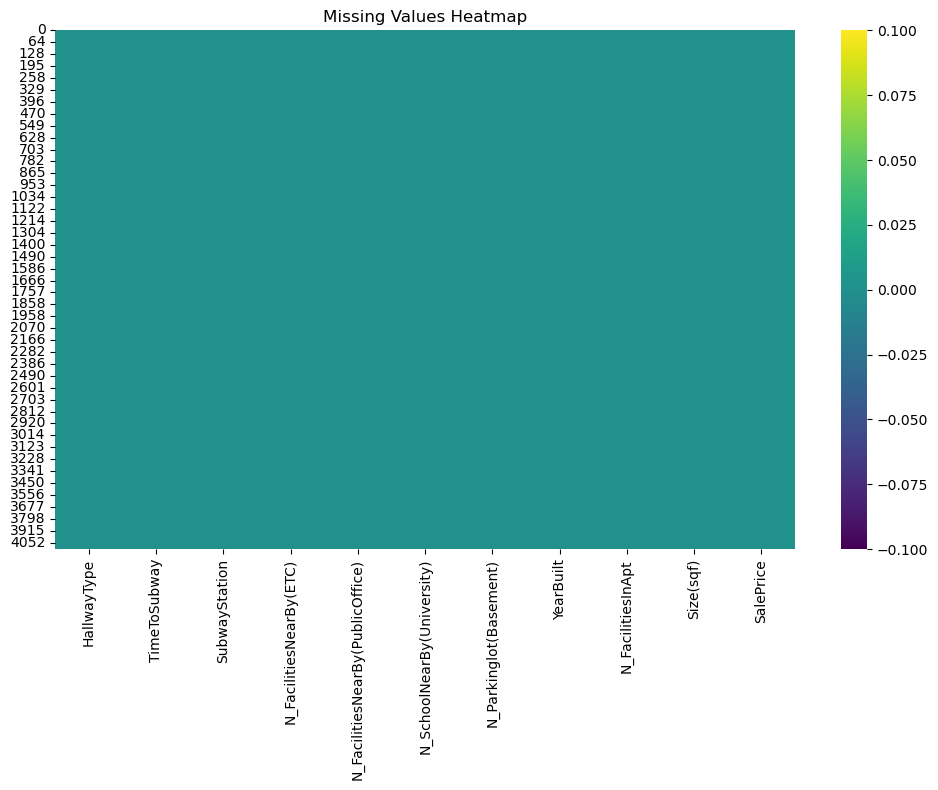

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

## Check for data with "no_subway_nearby" but time to subway is present

In [8]:
yes_bus_stop_nearby = df.loc[(df['SubwayStation'] == 'no_subway_nearby') & (df['TimeToSubway'] != 'no_bus_stop_nearby')]
yes_bus_stop_nearby

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
37,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,156,57522
39,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,391150
44,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,914,411504
83,corridor,5min~10min,no_subway_nearby,1.0,4.0,1.0,218.0,2014,1,135,56637
165,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,256637
...,...,...,...,...,...,...,...,...,...,...,...
3746,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,390707
3792,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,910,371681
3836,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,252212
3886,terraced,5min~10min,no_subway_nearby,0.0,1.0,1.0,1321.0,2015,10,644,269911


We decided to delete these data because there's zero context on the exact location

In [9]:
df = df.drop(yes_bus_stop_nearby.index)


## Convert Float columns into int64
This is because all data are whole numbers

In [10]:
for column in df.columns:
    if df[column].dtype == 'float64':  # Check if column is float64
        df[column] = df[column].astype('int64')  # Convert to int64
#Recheck DF types
df.shape, df.dtypes

((2613, 11),
 HallwayType                         object
 TimeToSubway                        object
 SubwayStation                       object
 N_FacilitiesNearBy(ETC)              int64
 N_FacilitiesNearBy(PublicOffice)     int64
 N_SchoolNearBy(University)           int64
 N_Parkinglot(Basement)               int64
 YearBuilt                            int64
 N_FacilitiesInApt                    int64
 Size(sqf)                            int64
 SalePrice                            int64
 dtype: object)

## Check for Outliers

In [11]:
# Filter columns with dtype 'int64' and 'float64
df_int64 = df.select_dtypes(include=['int64', 'float64'])

# Calculate Quartiles and IQR
Q3 = df_int64.quantile(0.75)
Q1 = df_int64.quantile(0.25)
IQR = Q3 - Q1

# Print Quartiles and IQR
print("Q1 (25th Percentile):\n", Q1)
print("\nQ3 (75th Percentile):\n", Q3)
print("\nIQR (Q3 - Q1):\n", IQR)

# Calculate Outliers
Jumlah_Outlier = []

for col in df_int64.columns:
    outliers = ((df_int64[col] < (Q1[col] - 1.5 * IQR[col])) | (df_int64[col] > (Q3[col] + 1.5 * IQR[col]))).sum()
    Jumlah_Outlier.append([col, outliers, outliers / len(df_int64)])

# Generate the output DataFrame
outlier_df = pd.DataFrame(
    Jumlah_Outlier,
    columns=['Column', 'Outlier', 'Percentage']
).sort_values(by=['Percentage'], ascending=False, ignore_index=True)

print("\nOutliers Summary:")
print(outlier_df)


Q1 (25th Percentile):
 N_FacilitiesNearBy(ETC)                  0.0
N_FacilitiesNearBy(PublicOffice)         3.0
N_SchoolNearBy(University)               2.0
N_Parkinglot(Basement)                 181.0
YearBuilt                             1993.0
N_FacilitiesInApt                        4.0
Size(sqf)                              743.0
SalePrice                           154424.0
Name: 0.25, dtype: float64

Q3 (75th Percentile):
 N_FacilitiesNearBy(ETC)                  5.0
N_FacilitiesNearBy(PublicOffice)         5.0
N_SchoolNearBy(University)               4.0
N_Parkinglot(Basement)                 798.0
YearBuilt                             2007.0
N_FacilitiesInApt                        7.0
Size(sqf)                             1192.0
SalePrice                           295575.0
Name: 0.75, dtype: float64

IQR (Q3 - Q1):
 N_FacilitiesNearBy(ETC)                  5.0
N_FacilitiesNearBy(PublicOffice)         2.0
N_SchoolNearBy(University)               2.0
N_Parkinglot(Basement)     

It was revealed that outliers are present, but we decided not to alter them as they only make up less than 1 percent of data.

In [12]:
def find_extremes_all_columns(df):
    extremes = {}
    for column in df.columns:
        if df[column].dtype in ['int64', 'float64']:  # Only consider numeric columns
            min_value = df[column].min()
            max_value = df[column].max()
            extremes[column] = (min_value, max_value)
    return extremes

extremes = find_extremes_all_columns(df)

for column, (min_val, max_val) in extremes.items():
    print(f"Column: {column}, Minimum: {min_val}, Maximum: {max_val}")

Column: N_FacilitiesNearBy(ETC), Minimum: 0, Maximum: 5
Column: N_FacilitiesNearBy(PublicOffice), Minimum: 0, Maximum: 7
Column: N_SchoolNearBy(University), Minimum: 0, Maximum: 5
Column: N_Parkinglot(Basement), Minimum: 0, Maximum: 1270
Column: YearBuilt, Minimum: 1978, Maximum: 2015
Column: N_FacilitiesInApt, Minimum: 2, Maximum: 10
Column: Size(sqf), Minimum: 206, Maximum: 2337
Column: SalePrice, Minimum: 32743, Maximum: 585840


# 2. EDA

### Distribution of Interval Data

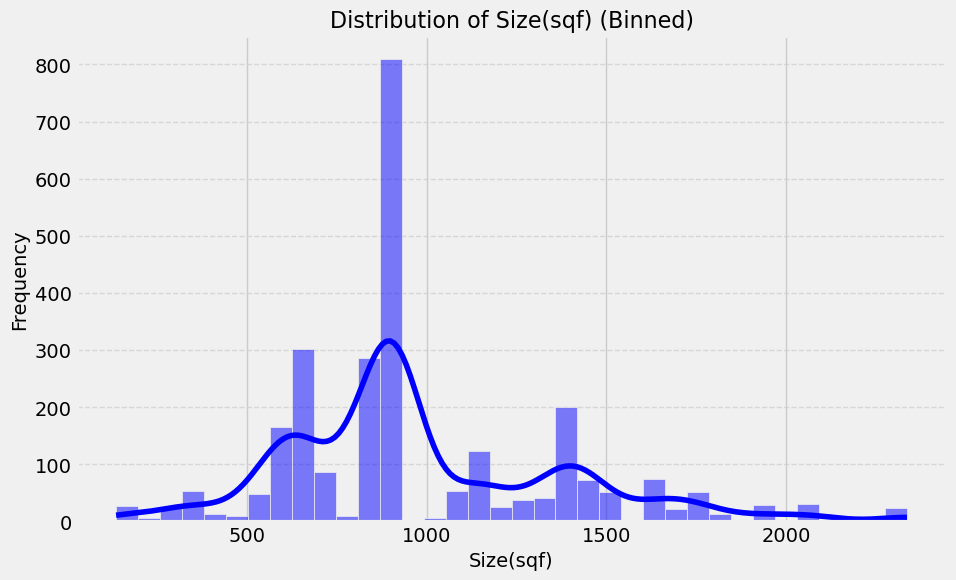

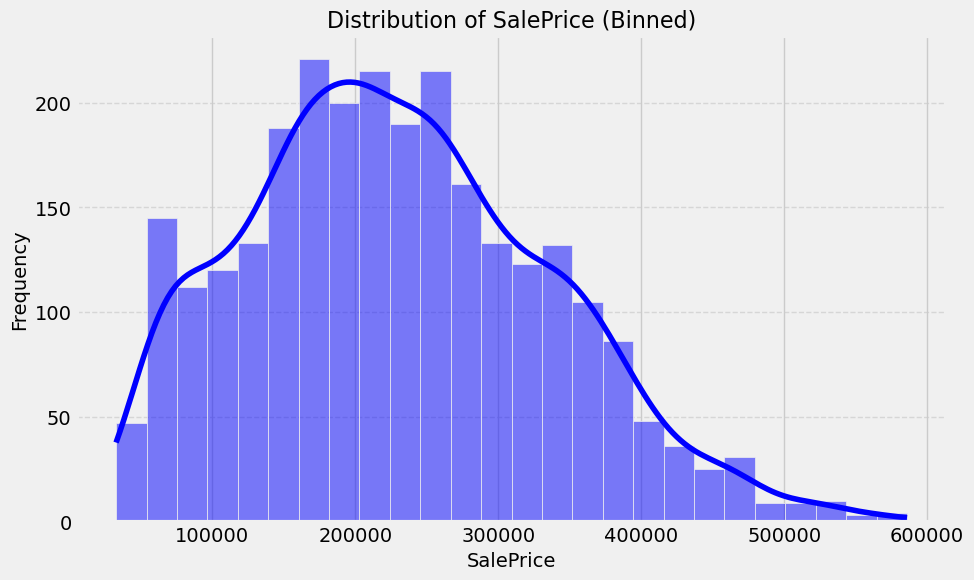

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    if df[column].nunique() >= 50:  # Only for numeric columns with unique values >= 50
        data = df[column].dropna()
        q1, q3 = np.percentile(data, [25, 75])
        iqr = q3 - q1
        bin_width = 2 * iqr / len(data)**(1/3)
        bins = int((data.max() - data.min()) / bin_width)

        plt.figure(figsize=(10, 6))
        sns.histplot(data, kde=True, bins=bins, color='blue')
        plt.title(f'Distribution of {column} (Binned)', fontsize=16)
        plt.xlabel(column, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()


## Distribution of Ordinal-numerical data

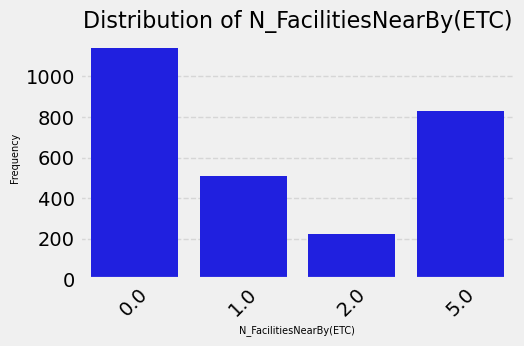

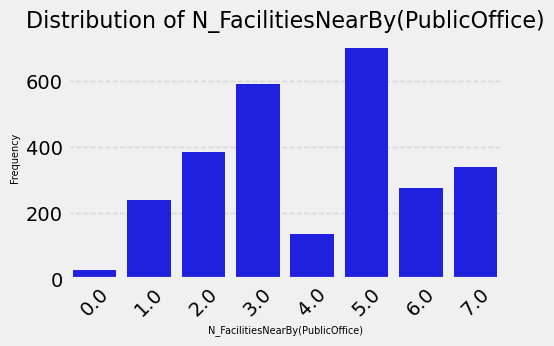

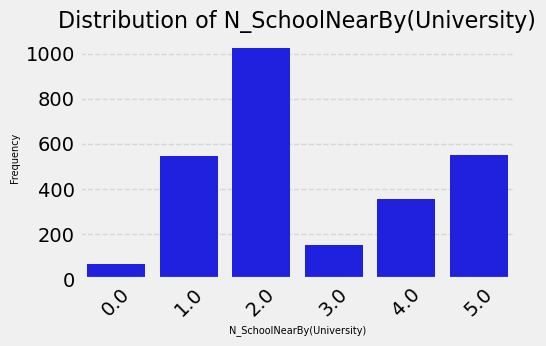

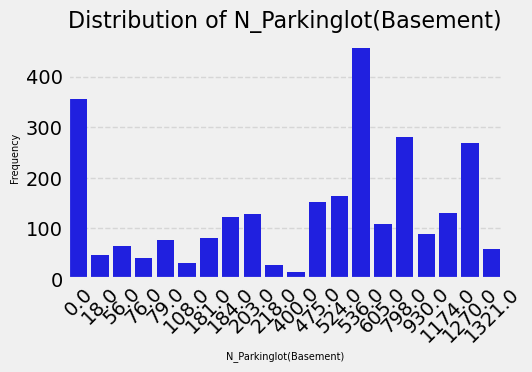

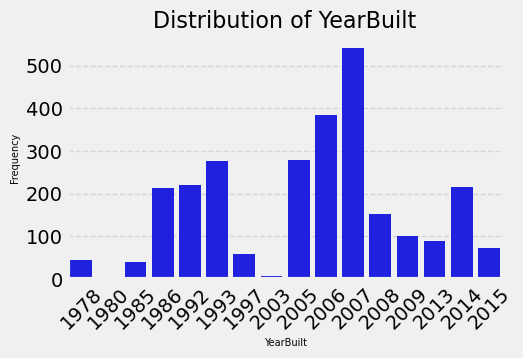

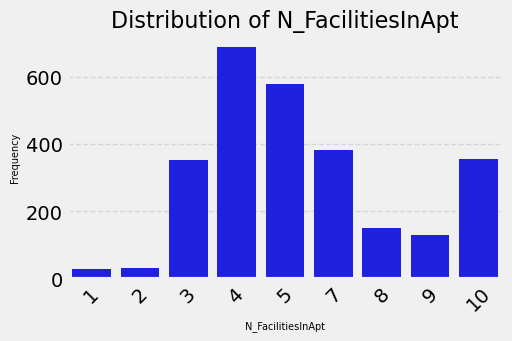

In [135]:
numeric_columns_small = [col for col in df.select_dtypes(include=['int64', 'float64']).columns 
                         if df[col].nunique() < 50]
for column in numeric_columns_small:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=df[column].value_counts().index, y=df[column].value_counts().values, color='blue')
    plt.title(f'Distribution of {column}', fontsize=16)
    plt.xlabel(column, fontsize=7)
    plt.ylabel('Frequency', fontsize=7)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(rotation=45)
    plt.show()


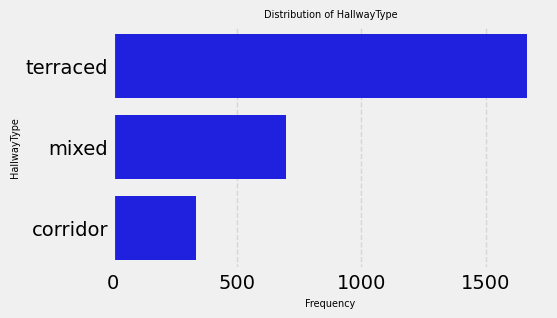

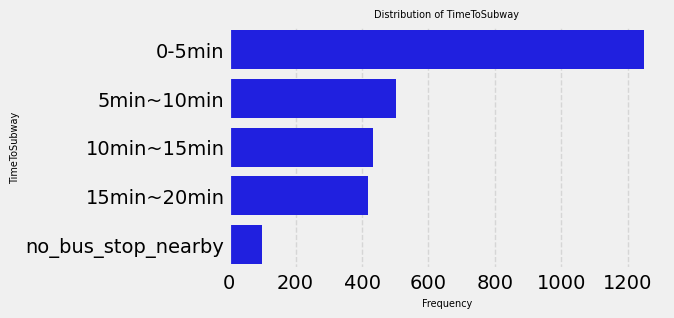

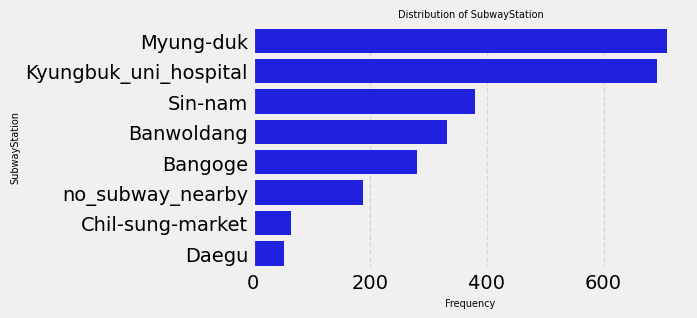

In [71]:
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns
for column in categorical_columns:
    plt.figure(figsize=(5, 3))
    sns.barplot(x=df[column].value_counts().values, 
                y=df[column].value_counts().index, 
                color='blue')
    plt.title(f'Distribution of {column}', fontsize=7)
    plt.xlabel('Frequency', fontsize=7)
    plt.ylabel(column, fontsize=7)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\1840868265.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index, palette="Blues_d")


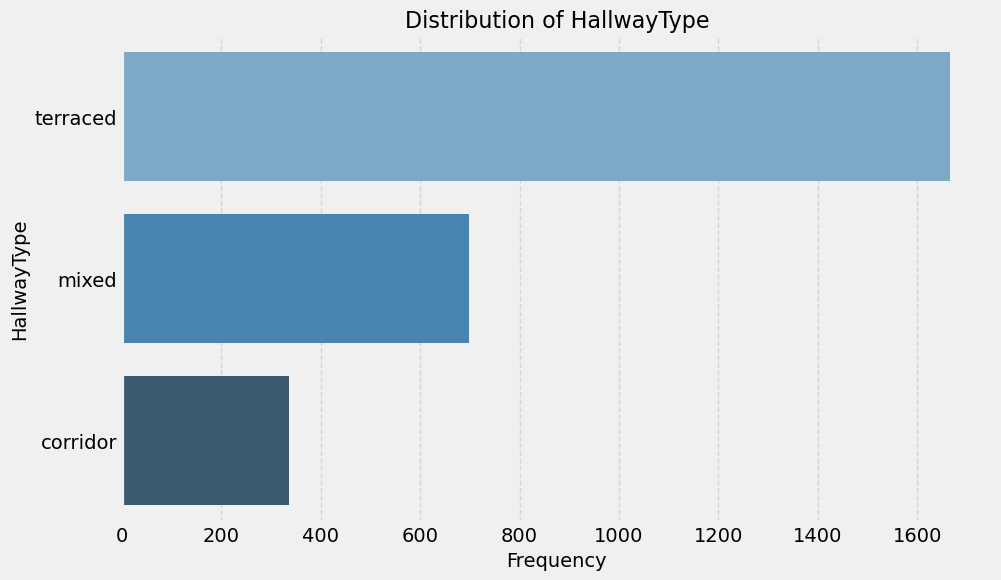

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\1840868265.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index, palette="Blues_d")


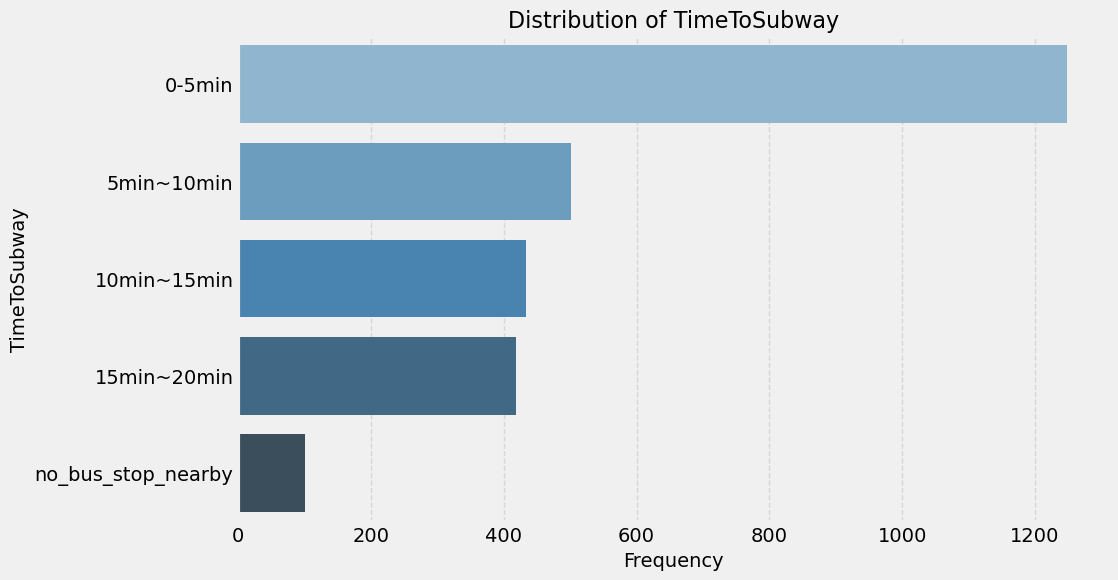

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\1840868265.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.values, y=data.index, palette="Blues_d")


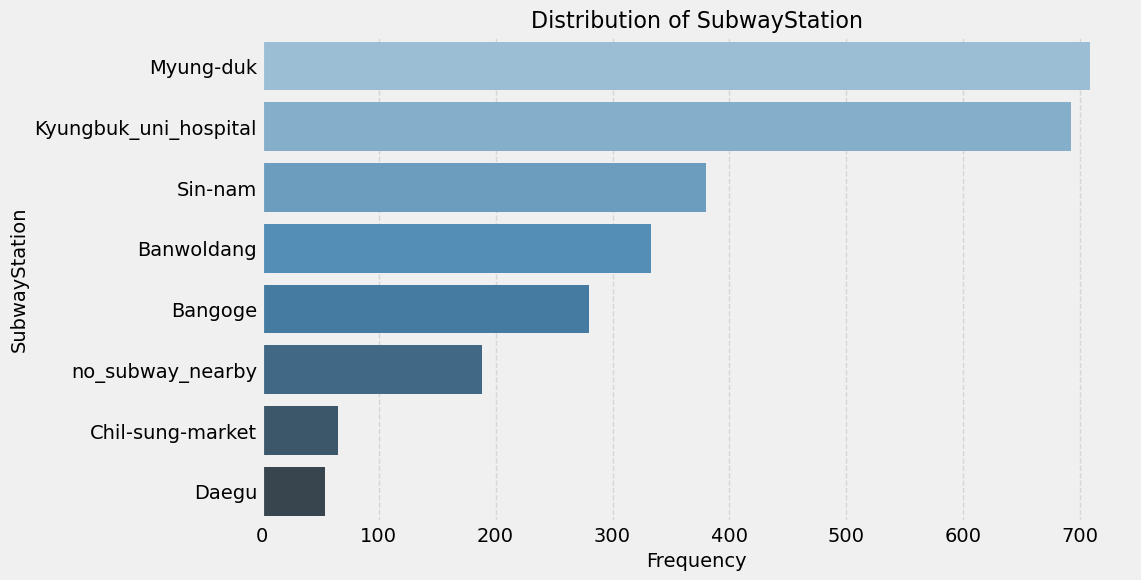

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\1840868265.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")


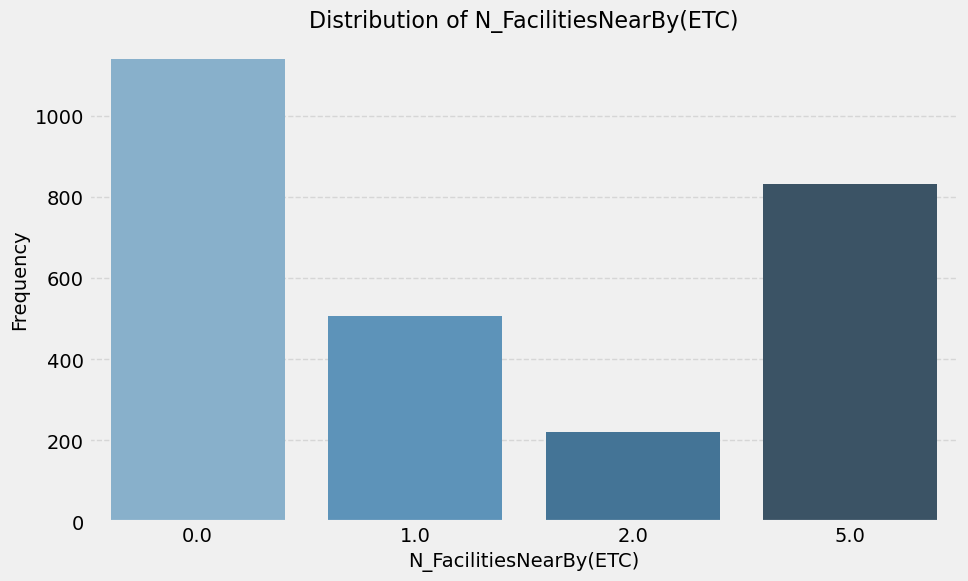

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\1840868265.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")


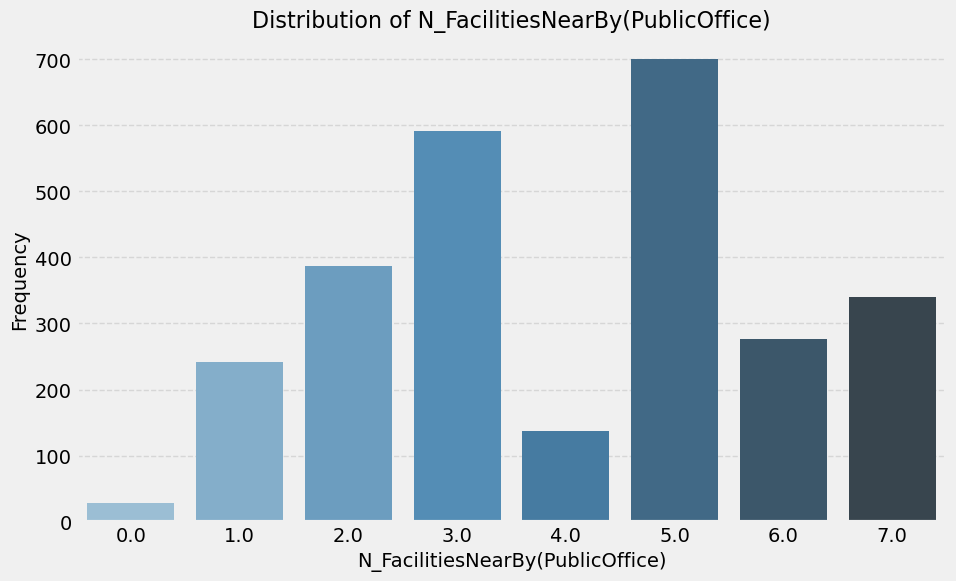

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\1840868265.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")


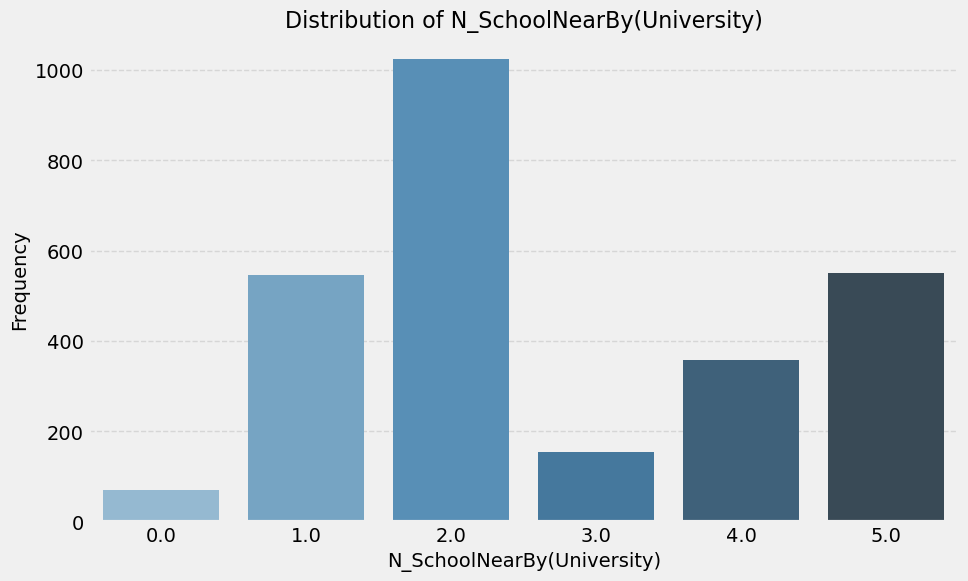

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\1840868265.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")


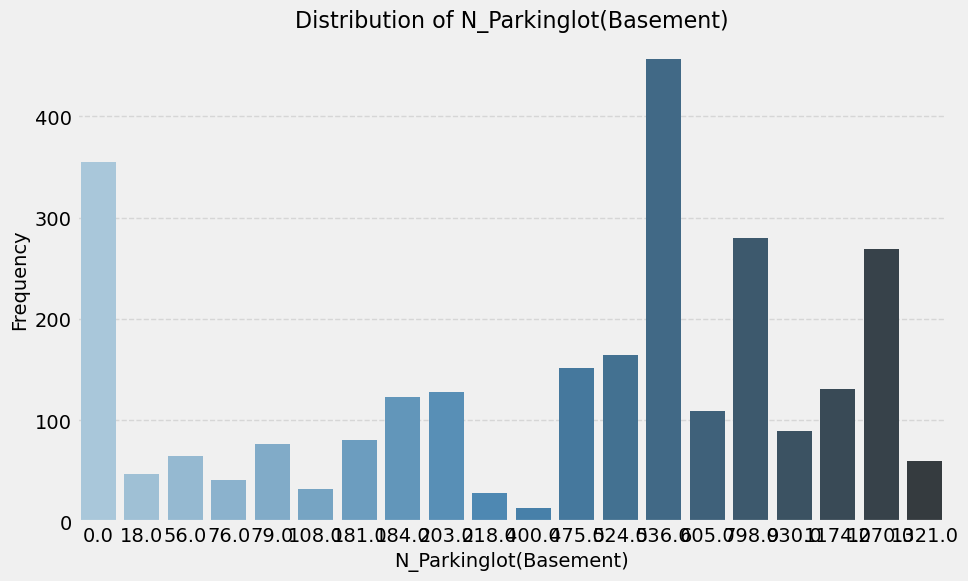

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\1840868265.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")


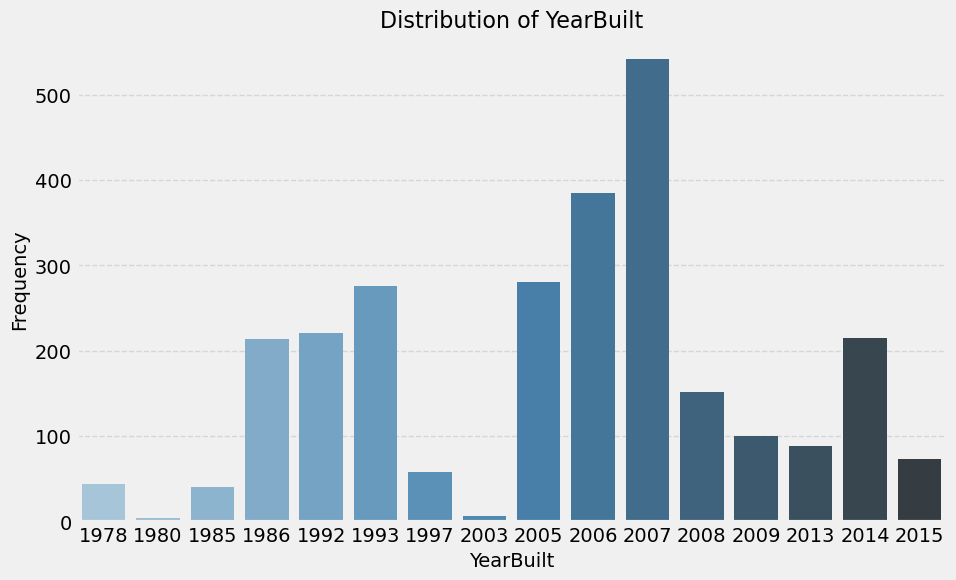

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\1840868265.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")


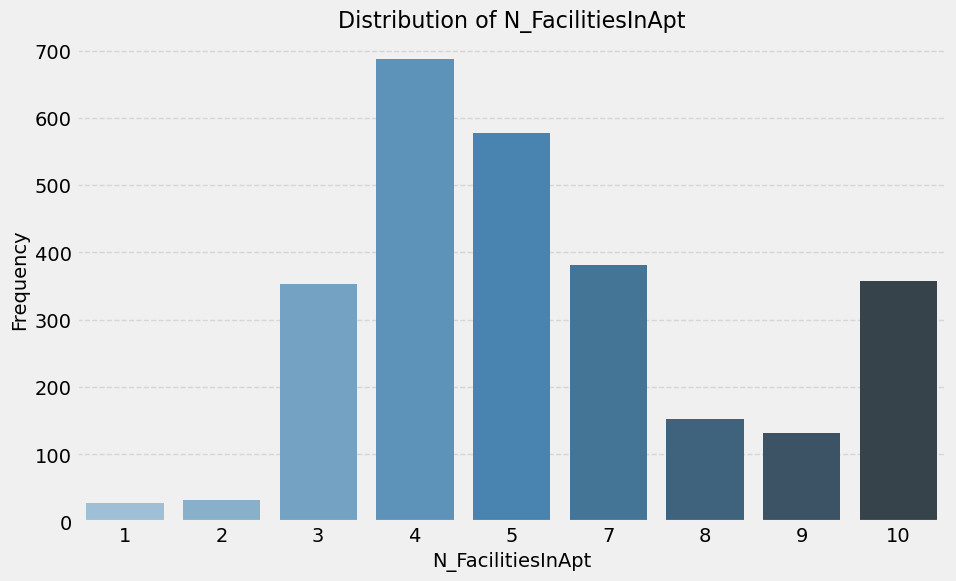

NameError: name 'freedman_diaconis_bins' is not defined

In [73]:
columns = df.columns
for column in columns:
    if df[column].dtype in ['int64', 'float64']:  # Numeric columns
        unique_values = df[column].nunique()
        data = df[column].dropna()  # Remove NaN values

        if unique_values >= 50:  # Use histogram with Freedman-Diaconis rule for larger numeric data
            bins = freedman_diaconis_bins(data)
            
            plt.figure(figsize=(10, 6))
            sns.histplot(data, kde=True, bins=bins, color='blue')
            plt.title(f'Distribution of {column}', fontsize=16)
            plt.xlabel(column, fontsize=14)
            plt.ylabel('Frequency', fontsize=14)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()
        
        else:  # Bar chart for numeric data with unique values < 50
            counts = data.value_counts().sort_index()
            
            plt.figure(figsize=(10, 6))
            sns.barplot(x=counts.index, y=counts.values, palette="Blues_d")
            plt.title(f'Distribution of {column}', fontsize=16)
            plt.xlabel(column, fontsize=14)
            plt.ylabel('Frequency', fontsize=14)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()
    
    else:  # Categorical columns
        data = df[column].value_counts()
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=data.values, y=data.index, palette="Blues_d")
        plt.title(f'Distribution of {column}', fontsize=16)
        plt.xlabel('Frequency', fontsize=14)
        plt.ylabel(column, fontsize=14)
        plt.grid(axis='x', linestyle='--', alpha=0.7)
        plt.show()


C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


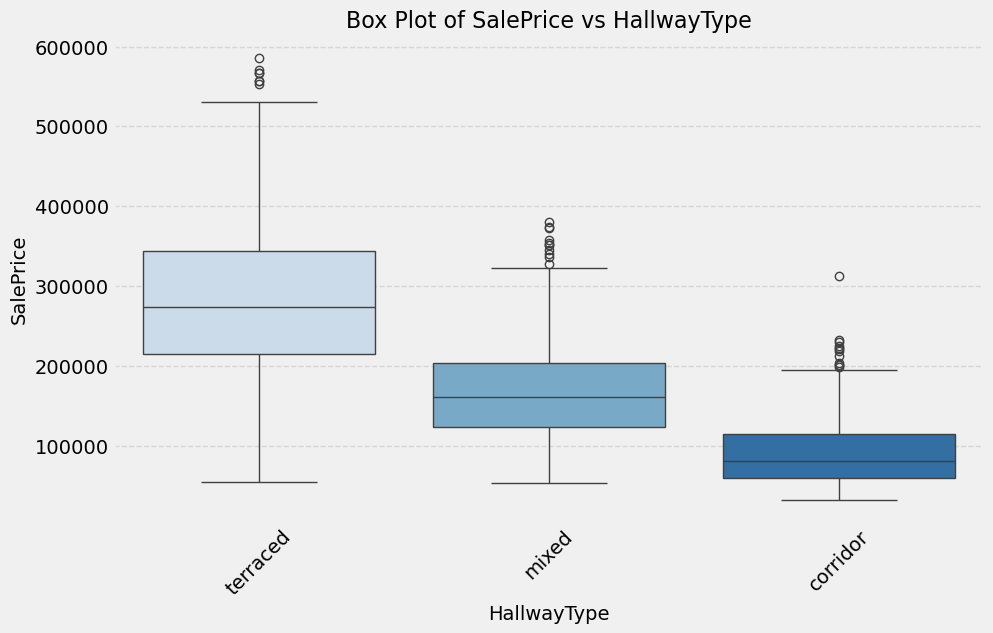

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


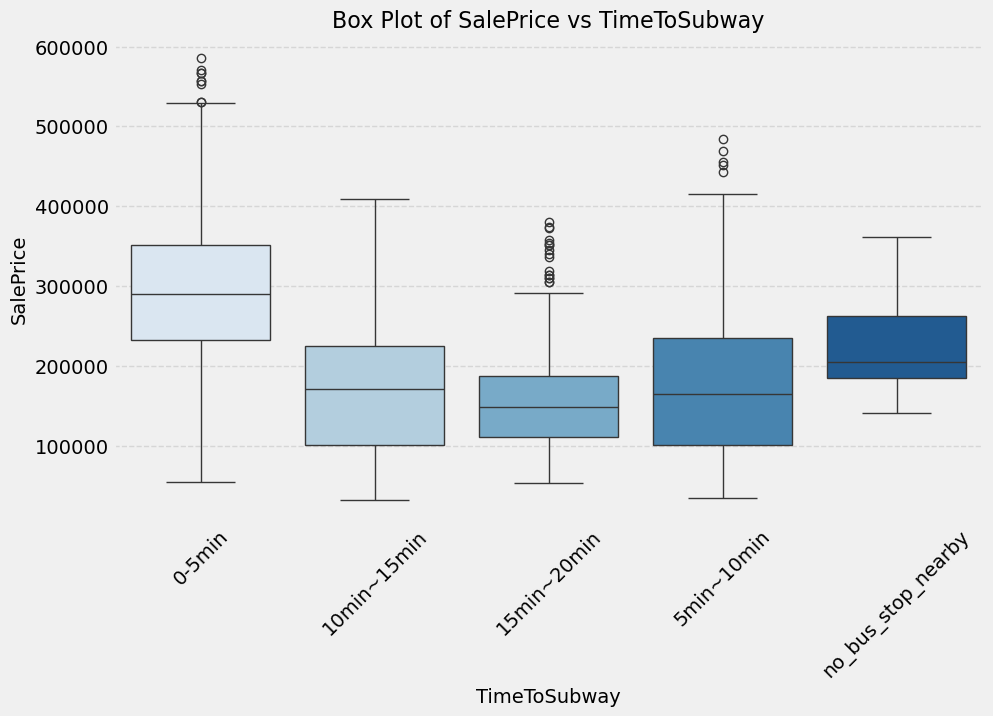

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


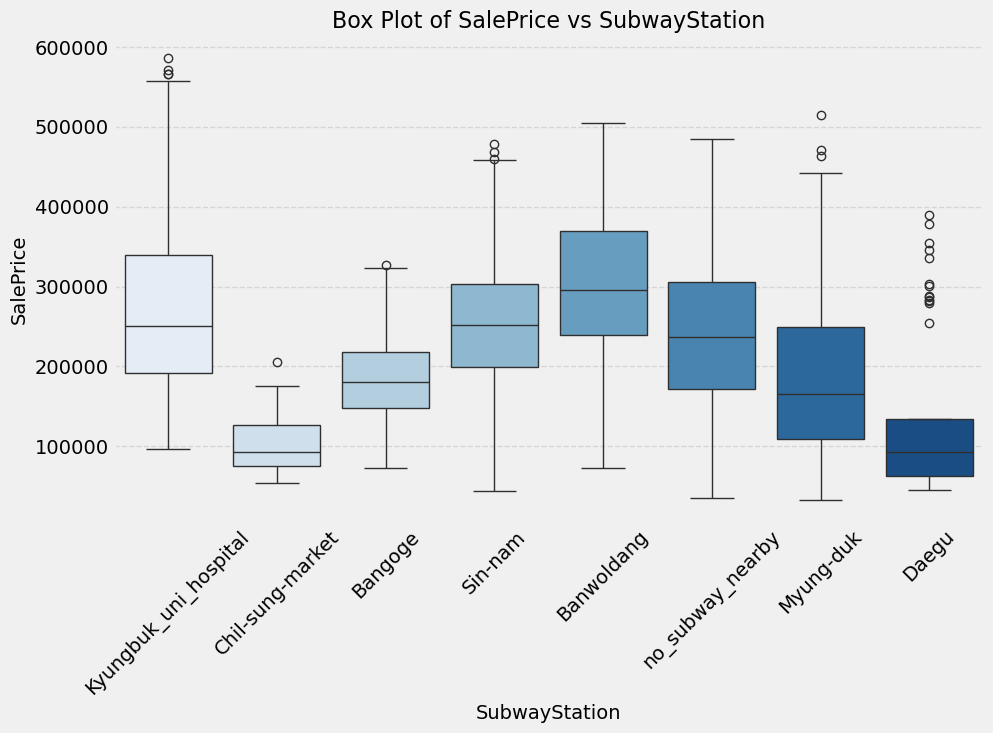

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


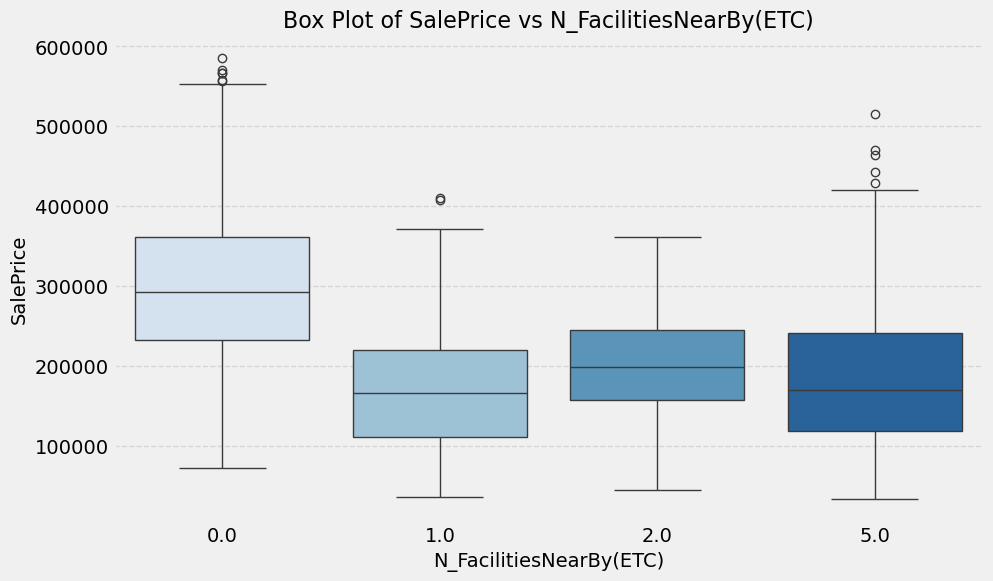

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


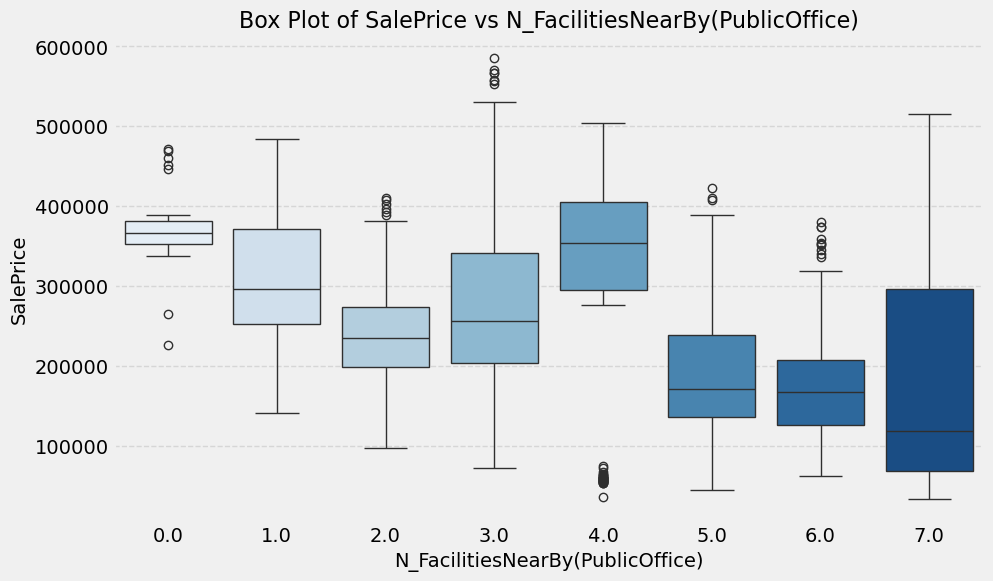

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


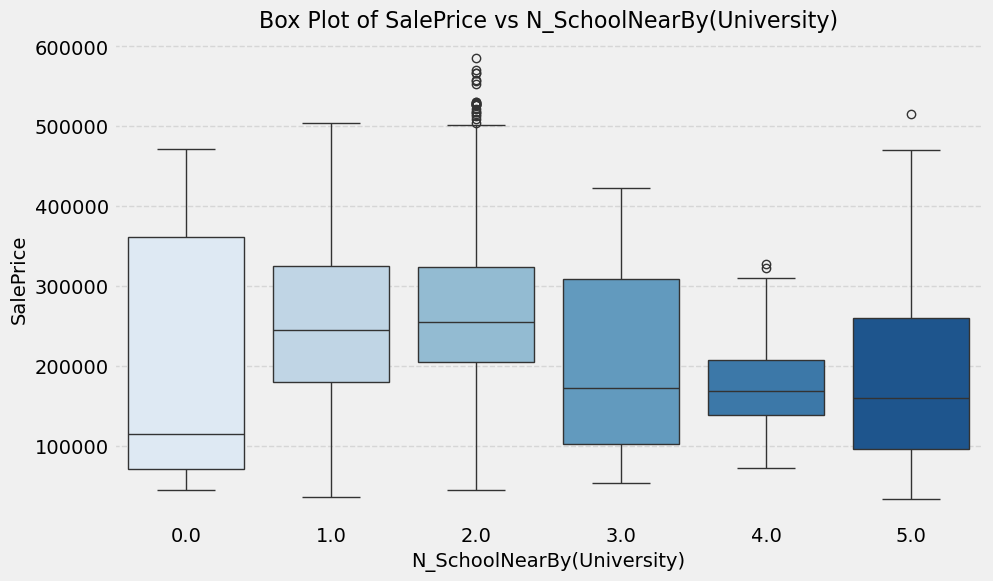

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


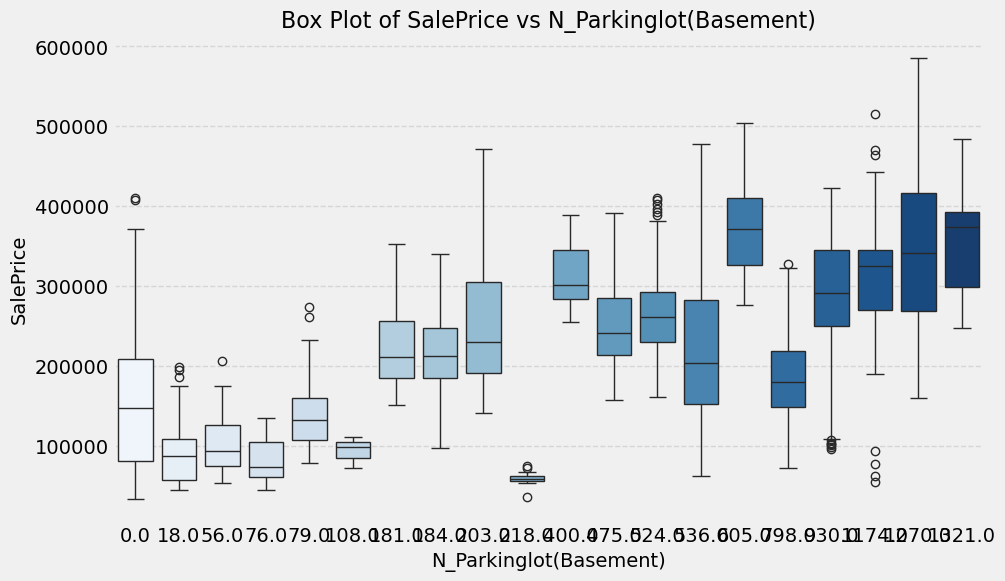

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


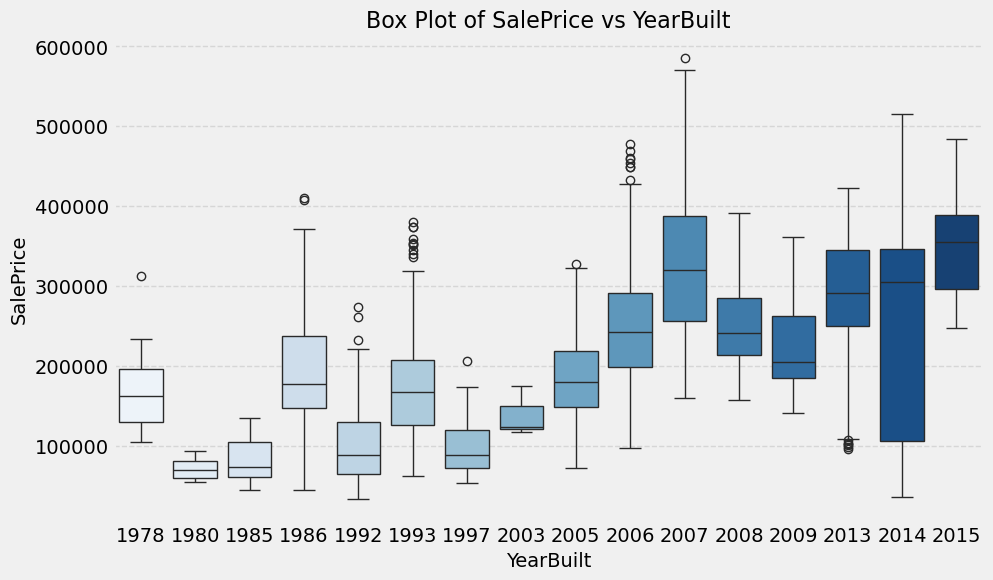

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


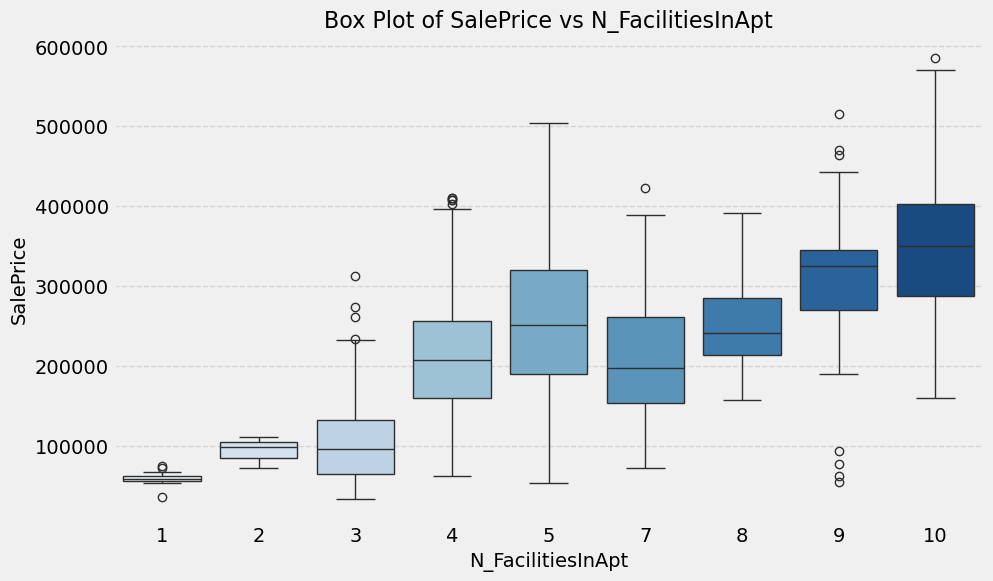

C:\Users\Farrel\AppData\Local\Temp\ipykernel_17424\526048213.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=column, y=target_column, palette='Blues')


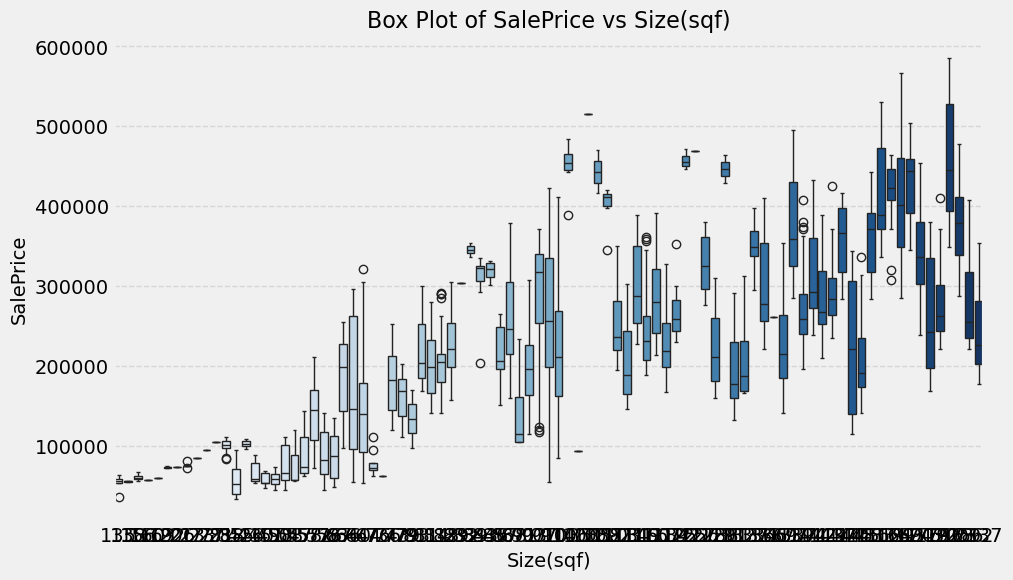

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_boxplots(df, target_column):
    """
    Visualize vertical box plots for each variable in the dataset against a target variable.
    
    Args:
        df (DataFrame): The input DataFrame.
        target_column (str): The target column (Y-axis).
    """
    # Iterate over each column except the target column
    for column in df.columns:
        if column != target_column:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=df, x=column, y=target_column, palette='Blues')
            plt.title(f'Box Plot of {target_column} vs {column}', fontsize=16)
            plt.xlabel(column, fontsize=14)
            plt.ylabel(target_column, fontsize=14)
            
            # Rotate X-axis labels for non-numeric features
            if df[column].dtype not in ['int64', 'float64']:
                plt.xticks(rotation=45)
            
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

# Example usage
visualize_boxplots(df, target_column='SalePrice')

In [206]:
df.select_dtypes(include=['object']).T.apply(lambda x: x.unique(), axis=1)

HallwayType                            [terraced, mixed, corridor]
TimeToSubway     [0-5min, 10min~15min, 15min~20min, 5min~10min,...
SubwayStation    [Kyungbuk_uni_hospital, Chil-sung-market, Bang...
dtype: object

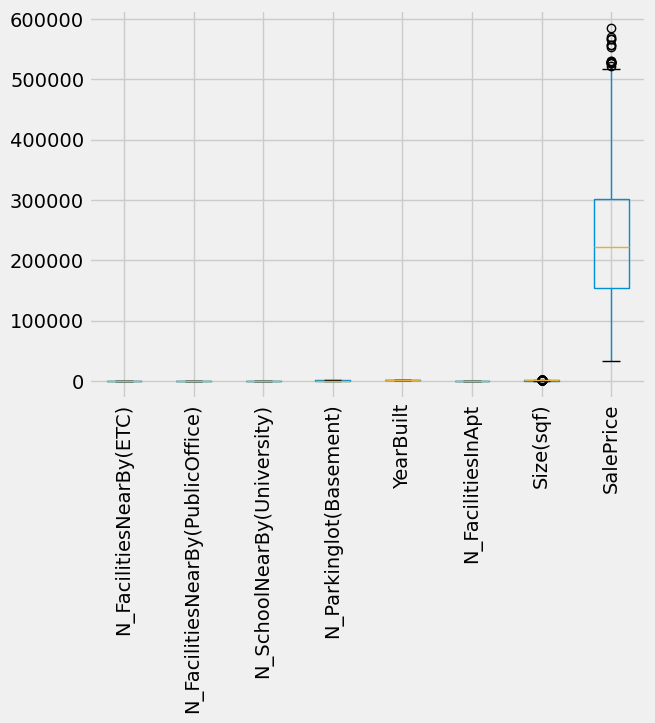

In [208]:
df.boxplot(rot=90);

# Correlation Identifier

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

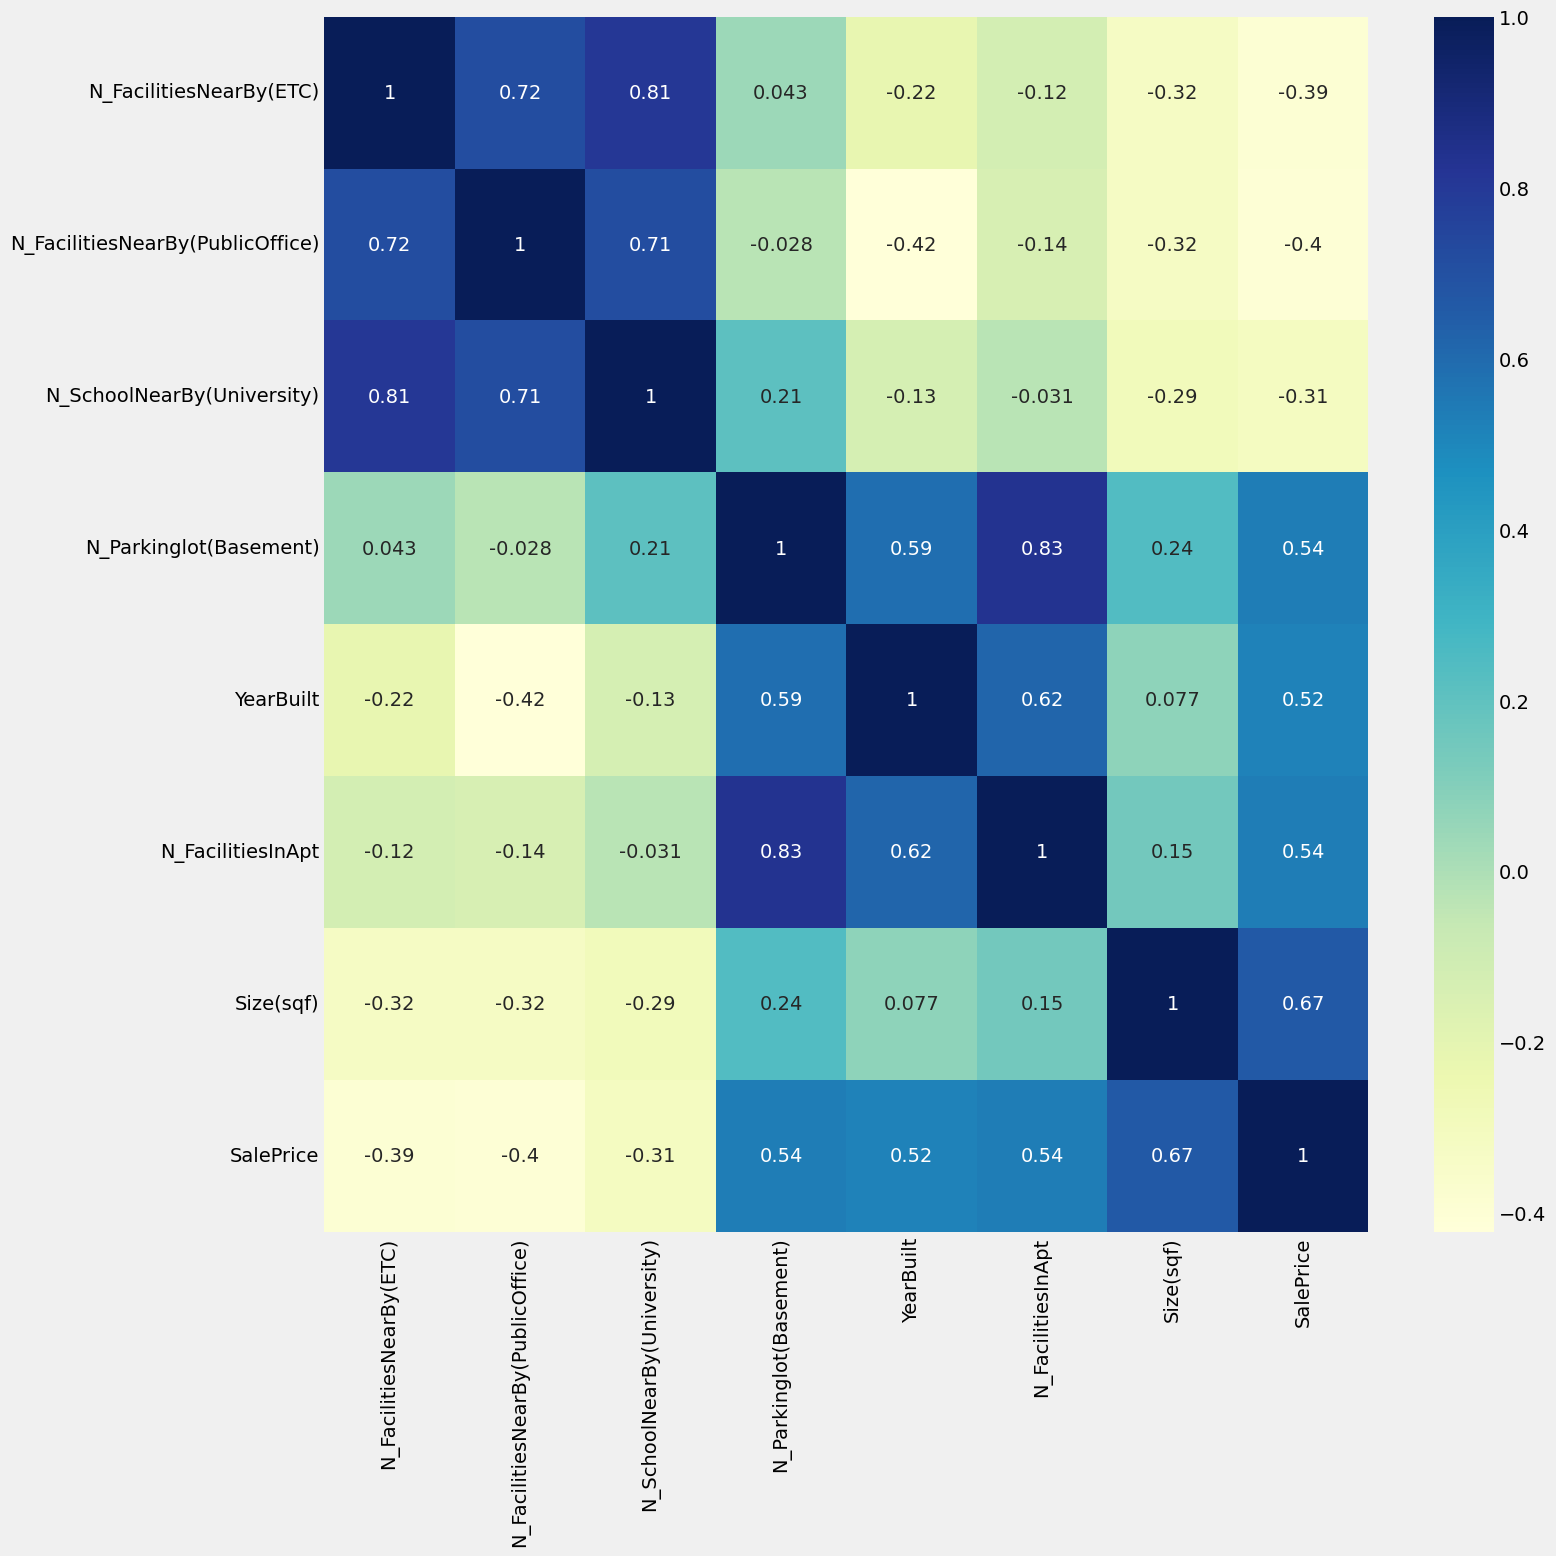

In [19]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,15))

# plotting correlation heatmap
dataplot = sns.heatmap(df_int64.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

**Findings**
* Strong positive correlation between SchoolNearBy and FacilitiesNearby.
* Strong negative correlation between YearBilt and FacilitiesNearby
* Correlation is present between SalePrice and each other data
* Due to the high correlation, we will be doing VIF after encoding the categorical variables

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
numeric_df = df.select_dtypes(exclude=['object'])

# Initialize a DataFrame to store VIF scores
vif_data = pd.DataFrame()
vif_data['feature'] = numeric_df.columns

# Calculate VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
print(vif_data)

                            feature        VIF
0           N_FacilitiesNearBy(ETC)   6.069258
1  N_FacilitiesNearBy(PublicOffice)  14.208970
2        N_SchoolNearBy(University)  17.900182
3            N_Parkinglot(Basement)  12.702120
4                         YearBuilt  37.740803
5                 N_FacilitiesInApt  29.918326
6                         Size(sqf)  15.771028
7                         SalePrice  18.497878


### Export cleaned data to a csv

In [23]:
file_name = 'daegu_cleaned.csv'
df.to_csv(file_name, sep=',', encoding='utf-8', index=False, header=True)